# Generate plots from CSV files

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:

window_type = "hann"
complexity = "Simple"
for window_type in ("rectangular", "hann", "blackman"):
    for complexity in ("Simple", "Complex"):
        path_to_results = "../Spectrogram Results 2/" + complexity + "/" + window_type + ".csv"

        df = pd.read_csv(path_to_results)

        plt.plot(df["0"], label='training loss')
        plt.plot(df["1"], label='validation loss')
        plt.ylim((0, 2))
        # plt.plot(df[""], label="who knows")
        plt.legend()
        plt.xlabel("Model iterations")
        plt.ylabel("Cross-entropy loss")
        if window_type == "blackman":
            temp = "Blackman"
        elif window_type == "hann":
            temp = "Hann"
        else:
            temp = window_type

        if complexity == "Simple":
            temp2 = "shallow"
        if complexity == "Complex":
            temp2 = "deeper"
        plt.title("Training and validation loss for " + temp + " window, " + temp2 + " network")

        plt.savefig("../Figures 2/" + window_type + complexity + ".png")
        plt.close()



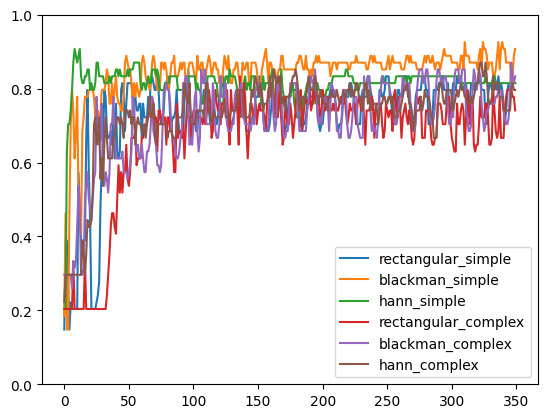

0.7518518518518519
0.8037037037037038
0.8481481481481481
0.7083333333333333
0.7226851851851852
0.7287037037037036


In [16]:
pathroot = "../Spectrogram Results 2"

Simple = "/Simple"
Complex  = "/Complex"
Custom = "/Custom"

hann = "/hann.csv"
blackman = "/blackman.csv"
rectangular = "/rectangular.csv"
mfcc = "/mfcc.csv"

df1 = pd.read_csv(pathroot + Simple + rectangular)
df2 = pd.read_csv(pathroot + Simple + blackman)
df3 = pd.read_csv(pathroot + Simple + hann)

df4 = pd.read_csv(pathroot + Complex + rectangular)
df5 = pd.read_csv(pathroot + Complex + blackman)
df6 = pd.read_csv(pathroot + Complex + hann)


plt.plot(df1["2"], label="rectangular_simple")
plt.plot(df2["2"], label="blackman_simple")
plt.plot(df3["2"], label="hann_simple")

plt.plot(df4["2"], label="rectangular_complex")
plt.plot(df5["2"], label="blackman_complex")
plt.plot(df6["2"], label="hann_complex")

plt.ylim((0, 1))
plt.legend()
plt.show()


def last10avg(indf, start, end):

    out = np.mean(indf["2"][start:-1])
    return out

for i in (df1, df2, df3):
    print(np.mean(i["2"][40:60]))

for i in (df4, df5, df6):
    print(np.mean(i["2"][80:120]))


### Report data from k-fold results

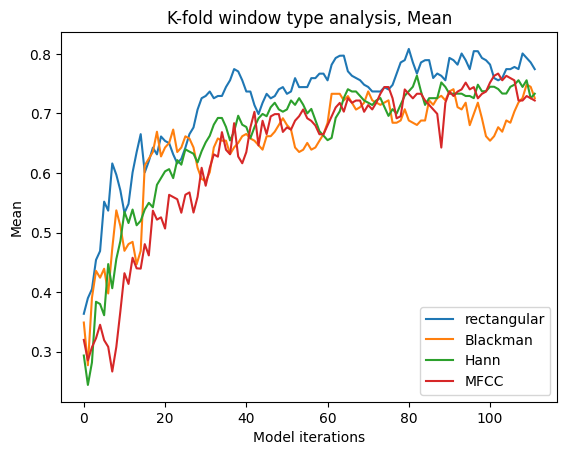

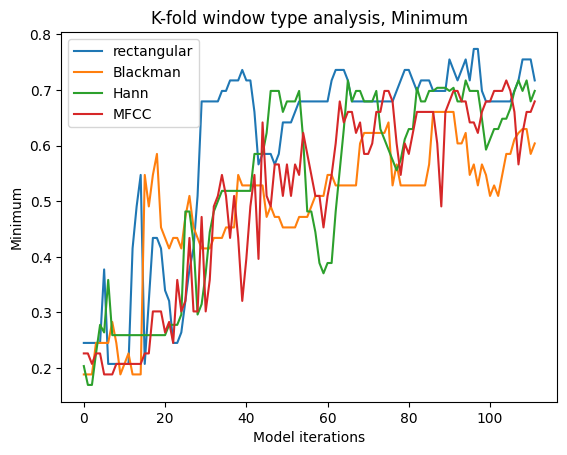

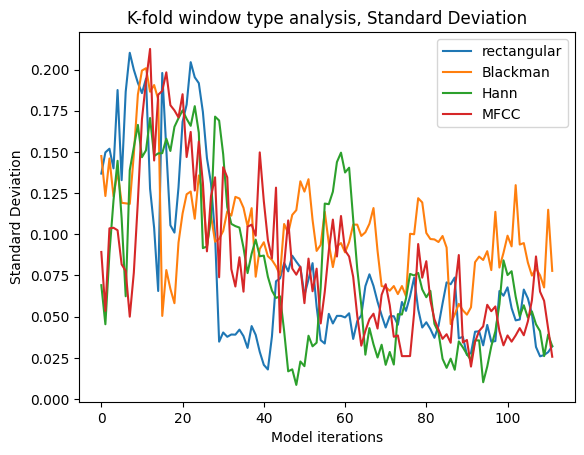

[0.78888889 0.83773585 0.77169811 0.76415094 0.72264151]
0.7770230607966457
0.03735837292073137

[0.63148148 0.77169811 0.63962264 0.82641509 0.67358491]
0.7085604472396925
0.0771919156867378

[0.69259259 0.78679245 0.70943396 0.73962264 0.77924528]
0.7415373864430468
0.03714780056776398

[0.75740741 0.69811321 0.68301887 0.76037736 0.81132075]
0.7420475192173306
0.6830188679245284
0.04644415085877326


In [3]:
pathroot = "../KFold results 2"

rectangular = "/rectangular.csv"
hann = "/hann.csv"
blackman = "/blackman.csv"
mfcc = "/mfcc.csv"

rectangular_df = pd.read_csv(pathroot + rectangular)
blackman_df = pd.read_csv(pathroot + blackman)
hann_df = pd.read_csv(pathroot + hann)
mfcc_df = pd.read_csv(pathroot + mfcc)

out_list = []


def makeKFoldPlots(func, name):
    plt.plot(func(rectangular_df.transpose(), axis=0), label="rectangular")
    plt.plot(func(blackman_df.transpose(), axis=0), label="Blackman")
    plt.plot(func(hann_df.transpose(), axis=0), label="Hann")
    plt.plot(func(mfcc_df.transpose(), axis=0), label="MFCC")

    plt.xlabel("Model iterations")
    plt.ylabel(name)
    plt.title("K-fold window type analysis, " + name)

    plt.legend()

    # plt.savefig("../Figures 2/kfold" + name + ".png")
    plt.show()
    # plt.close()

makeKFoldPlots(np.mean, "Mean")
makeKFoldPlots(np.min, "Minimum")
makeKFoldPlots(np.std, "Standard Deviation")


def last10avg(df):
    window = 10
    last_rows = df.iloc[-window:, :]
    return np.mean(last_rows, axis=0).to_numpy()

out_rectangular = last10avg(rectangular_df)
out_blackman = last10avg(blackman_df)
out_hann = last10avg(hann_df)
out_mfcc = last10avg(mfcc_df)

print(out_rectangular)
print(np.mean(out_rectangular))
print(np.std(out_rectangular))
print()
print(out_blackman)
print(np.mean(out_blackman))
print(np.std(out_blackman))
print()
print(out_hann)
print(np.mean(out_hann))
print(np.std(out_hann))
print()
print(out_mfcc)
print(np.mean(out_mfcc))
print(np.min(out_mfcc))
print(np.std(out_mfcc))



## MFCCs

In [3]:
window_type = "mfcc"
for complexity in ("Simple", "Custom"):
    path_to_results = "../Spectrogram Results/" + complexity + "/" + window_type + ".csv"

    df = pd.read_csv(path_to_results)

    plt.plot(df["0"], label='training loss')
    plt.plot(df["1"], label='validation loss')
    plt.ylim((0, 2))
    # plt.plot(df[""], label="who knows")
    plt.legend()
    plt.xlabel("Model iterations")
    plt.ylabel("Cross-entropy loss")
    if window_type == "blackman":
        temp = "Blackman"
    elif window_type == "hann":
        temp = "Hann"
    elif window_type == "mfcc":
        temp = "MFCC"
    else:
        temp = window_type
    
    if complexity == "Simple":
        temp2 = "shallow"
    if complexity == "Complex":
        temp2 = "deeper"
    plt.title("Training and validation loss for " + temp + " window, " + temp2 + " network")

    plt.savefig("../Figures 2/" + window_type + complexity + ".png")
    plt.close()

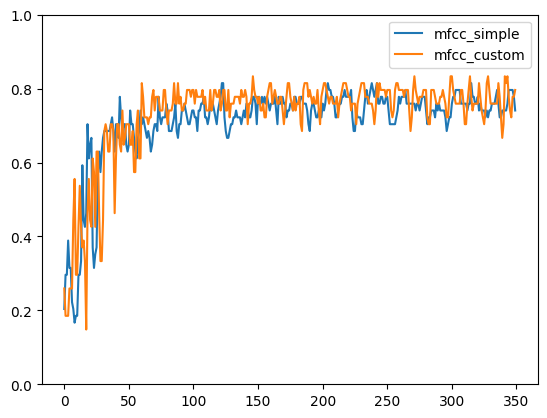

0.725
0.7699074074074074


In [4]:
pathroot = "../Spectrogram Results"

df7 = pd.read_csv(pathroot + "/Simple/mfcc.csv")
df8 = pd.read_csv(pathroot + "/Custom/mfcc.csv")


plt.plot(df7["2"], label="mfcc_simple")
plt.plot(df8["2"], label="mfcc_custom")


plt.ylim((0, 1))
plt.legend()
plt.show()


def last10avg(indf, start, end):

    out = np.mean(indf["2"][start:-1])
    return out

for i in (df7, df8):
    print(np.mean(i["2"][80:120]))